# Steps
This part explains what steps I have taken so far in order to scatter-plot one subject’s beta values as a function of spatial frequency.

In [2]:
import sys

from pandas.core.common import SettingWithCopyWarning

sys.path.append('..')
import pandas as pd
import numpy as np
import os
from sfp_nsdsyn import save_stimuli_description
from sfp_nsdsyn import prep
import warnings 

warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
%load_ext autoreload
%autoreload 2


# Download the log polar stimuli description file from OSF and modify the dataframe

In [3]:
stim_df = prep.load_stim_info_as_df('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsyn_stim_description_corrected.csv,', drop_phase=False)
stim_df.reset_index()


File successfully downloaded and saved as /Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsyn_stim_description_corrected.csv,


TypeError: Index(...) must be called with a collection of some kind, '' was passed

## 1. Make a .csv file that contains stimuli information
I first created a dataframe that contains all stimuli information in order of the image index in the NSD synthetic experimental design.
As with the experiment by Broderick et al (2022), the experiment contains 4 different stimulus types: pinwheel, forward spiral, annulus, and reverse spiral. Adding to that, there was intermediate stimulus type - which has the same frequency across the visual field but ___. I first named them all differently (e.g. intermediate 1, intermediate 2, ..), but they all can be defined as just 'intermediate' because ___.
Except for intermediate stimuli, all stimulus types had 6 different frequency levels and 4 different phase shifts. The order of stimulus class in the experimental design was pinwheel-forward spiral-annulus-reverse spiral. For each stimulus type, spiral images come in a group of 4, as the only difference in each group of 4 is just a phase shift. Image index and frequency level was organized in an ascending manner. For example, 4 pinwheel images with frequency level 1 is followed by 4 pinwheel images with frequency level 2, and then by the same stimulus class with frequency level 3.
On the other hand, intermediate stimuli only had one frequency level. The total number of images were 112 (4 regular stim class * 4 phase * 6 frequency + 4 intermediate class * 4 phase * 1 frequency).

In [12]:
n_all_stims = 112 # number of sf stims presented in nsdsynthetic experiment
regular_sf_stims = ['pinwheel', 'forward spiral', 'annulus', 'reverse spiral']
base_sf_stims = ['intermediate 1', 'intermediate 2', 'intermediate 3', 'intermediate 4']
freq_levels = np.arange(0, 6) # from K. Kay's nsdsynthetic experiment design.m
phase_levels = [0.0, 1.570796327, 3.141592654, 4.71238898] # from K. Kay's nsdsynthetic experiment design.m
used_phase_idx = np.arange(0, 8, 2)
n_sf_stims = len(regular_sf_stims)
n_sf_int_stims = 4
n_phase = len(phase_levels)
n_freq = len(freq_levels)

save_file_name = 'nsdsynthetic_sf_stim_description.csv'
save_path = os.path.join('/Users/jh7685/Dropbox/NYU/Projects/SF/natural-scenes-dataset/Deravatives',
                         save_file_name)


Here we're loading task-sfp_stim_description.csv from the Broderick et al (2022) author's [OSF](https://osf.io/hcu78/) to read w_a and w_r information.

In [13]:
# load Broderick et al's spatialFrequencyStim.mat
original_stim_descriptions_path = '/Users/jh7685/Dropbox/NYU/Projects/SF/prac/task-sfp_stim_description.csv'
stim_df = pd.read_csv(original_stim_descriptions_path)

Columns indicate information type. Following columns were included in the final dataframe:
1. image_idx: This indicates the no. of images in NSD synthetic experimental design. The total images used in the experiment was 784, and log-polar images started from 105 and finished at 216 (The image started from 1). Since most of my scripts will be written in Python, I reset the index as 104 to 215 assuming the very first number starts from 0.
2. names: This indicates stimulus class name, such as pinwheel, annulus, etc.
3. name_idx: This column contains numbers each corresponding to a different name in the column 2 (0: pinwheel, 1:forward spiral, 2:annulus, 3:reverse spiral, 4: intermediate1, 5:intermediate2, 6:intermediate3, 7:intermediate4)
4. w_r: This is a radial frequency that specifies the number of radians per unit increase in ln(r).
5. w_a: This is an angular frequency specifying the number of grating cycles per revolution around the image.
6. frequency level: This indicates a local frequency level. Regular stimulus classes have 6 different levels (0-6)
7. phase: This indicates how much phase shift there was for that specific image (see `phase_levels` variable in line 5).
8. phase index: This indicates a phase level. In this column I just marked 4 different levels (0, 2, 4, 6), it's because NSD synthetic dataset used every other phase of a phase vector used in Broderick et al (2022).



In [10]:
df = save_stimuli_description.create_stimulus_df(regular_sf_stims, n_phase, n_freq, base_sf_stims, stim_df)

In [11]:
df.head()

,image_idx,names,names_idx,w_r,w_a,freq_lvl,phase,phase_idx
0,104,pinwheel,0,0.0,6.0,0,0.0,0
1,105,pinwheel,0,0.0,6.0,0,1.570796,2
2,106,pinwheel,0,0.0,6.0,0,3.141593,4
3,107,pinwheel,0,0.0,6.0,0,4.712389,6
4,108,pinwheel,0,0.0,11.0,1,0.0,0


In [7]:
import h5py

filename = '/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata_stimuli/stimuli/nsdsynthetic/nsdsynthetic_stimuli.hdf5'

with h5py.File(filename, "r") as f:

    # get first object name/key; may or may NOT be a group
    data = list(f['imgBrick'])



Keys: <KeysViewHDF5 ['imgBrick']>


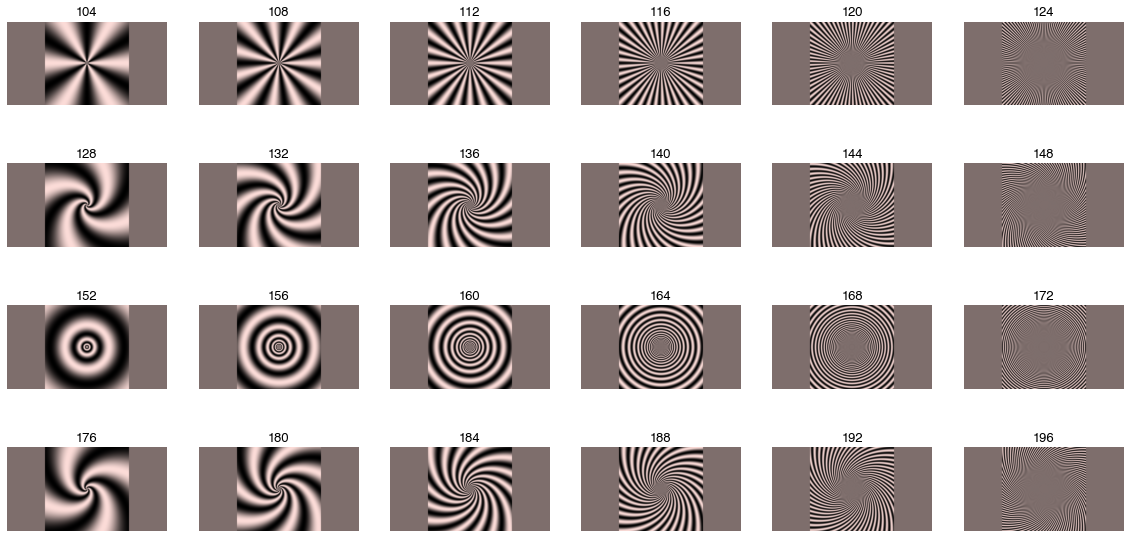

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 6, figsize=(20, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(data[104+(i*4)], cmap='gray')
    ax.axis('off')
    ax.set_title(f'{104+(i*4)}')

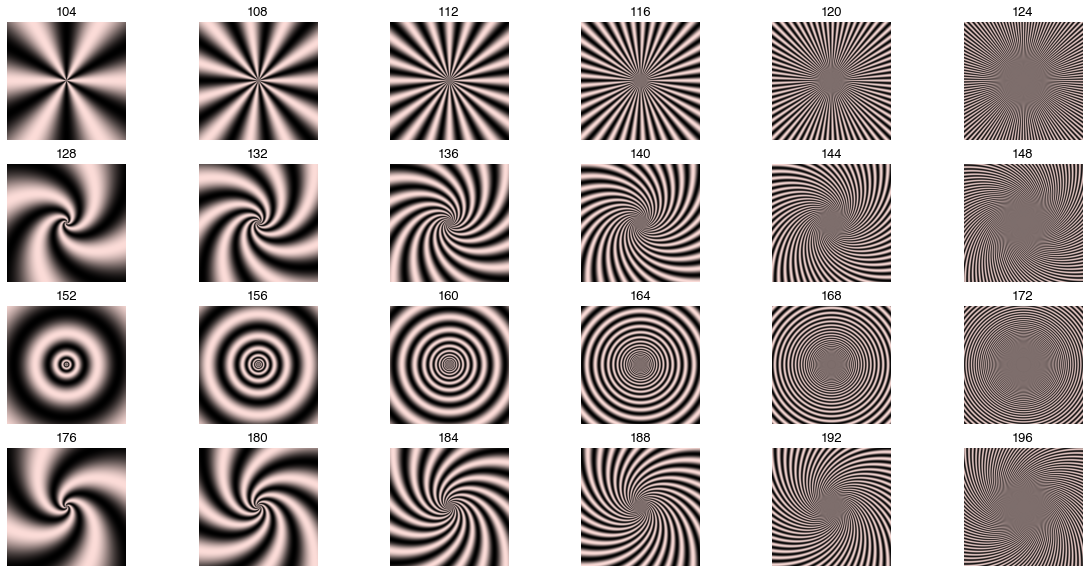

In [22]:
start_x = (1360 - 714) // 2
end_x = start_x + 714
fig, axes = plt.subplots(4, 6, figsize=(20, 10))

for i, ax in enumerate(axes.flat):
    center_square = data[104+(i*4)][:, start_x:end_x, :]
    ax.imshow(center_square, cmap='gray')
    ax.axis('off')
    ax.set_title(f'{104+(i*4)}')



In [24]:
im_numbers = [104+(i*4) for i in range(24)]

In [26]:

from PIL import Image
for i in im_numbers:
    img = data[i]
    center_square = img[:, start_x:end_x, :]
    center_square_image = Image.fromarray(center_square)
    f = os.path.join('/Users/jh7685/Dropbox/NYU/Projects/SF/natural-scenes-dataset/stimuli', f'scaled_gratings_{i}.png')
    center_square_image.save(f, format="PNG", optimize=True)

In [9]:
stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsyn_stim_description.csv')

stim_info = stim_info.drop_duplicates(subset=['class_idx'])
stim_info = stim_info.replace({'names': {'intermediate 1': 'intermediate', 
                                         'intermediate 2': 'intermediate', 
                                         'intermediate 3': 'intermediate', 
                                         'intermediate 4': 'intermediate'}})

In [103]:
bd_stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/Broderick_dataset/broderick_stim_description.csv')

bd_stim_info = bd_stim_info.drop_duplicates(subset=['class_idx'])
bd_stim_info = bd_stim_info.replace({'names': {'mixtures': 'intermediate'}})

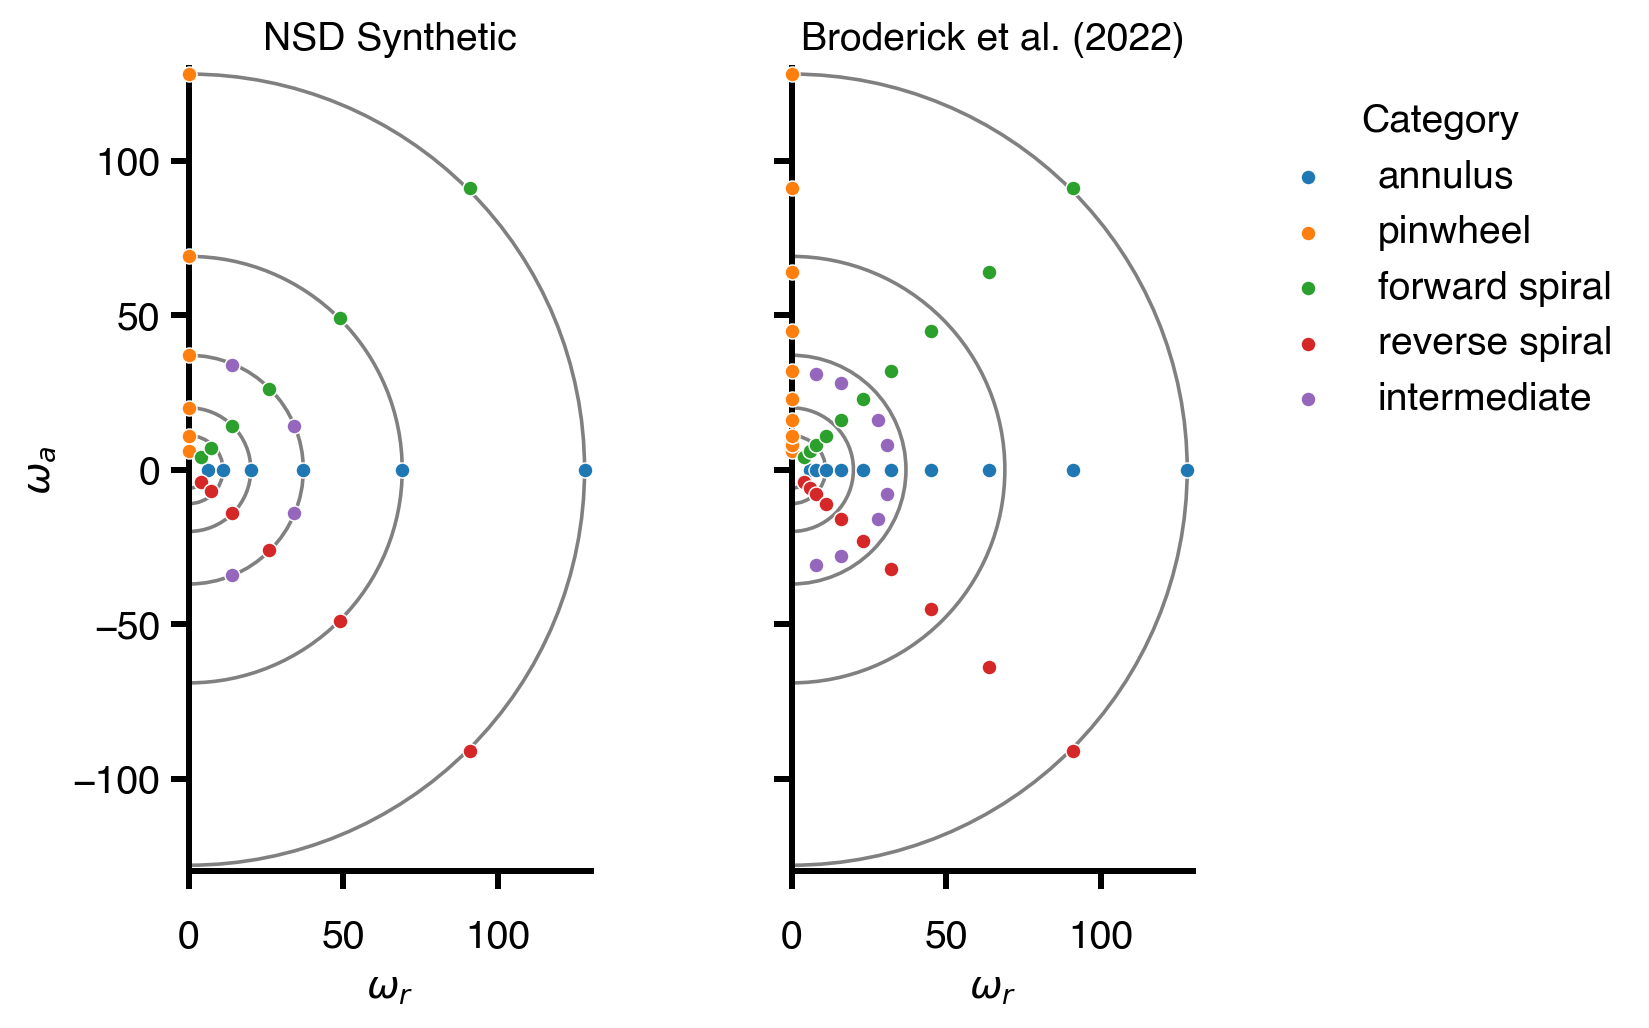

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

rc = {'text.color': 'black',
      'axes.labelcolor': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'axes.edgecolor': 'black',
      'font.family': 'Helvetica',
      'axes.linewidth': 2,
      'xtick.major.pad': 10,
      'xtick.major.width': 2,
      'ytick.major.width': 2,
      'lines.linewidth': 2,
      'font.size': 13,
      'axes.titlesize': 13,
      'axes.labelsize': 13,
      'xtick.labelsize': 13,
      'ytick.labelsize': 13,
      'legend.title_fontsize': 13,
      'legend.fontsize': 13,
      'figure.titlesize': 13,
      'figure.dpi': 72 * 3,
      'savefig.dpi': 72 * 4,
      'axes.labelpad': 5,
      }

sns.set_theme(style="ticks", context='notebook', rc=rc, font_scale=1)
fig, axes = plt.subplots(1,2, sharey=True)
fig.set_size_inches(6, 6)
colors = [sns.color_palette('tab10', 10)[:][k] for k in [0,1,2,3,4]]
colors.append('gray')
for i, cat in enumerate(['annulus', 'pinwheel', 'forward spiral', 'reverse spiral', 'intermediate']):

    axes[0].scatter(stim_info.query(f'names == "{cat}"')['w_r'], 
                    stim_info.query(f'names == "{cat}"')['w_a'], label=cat, s=25, 
                    color=colors[i], edgecolors='w', linewidths=0.5, zorder=100, clip_on=False)
    axes[1].scatter(bd_stim_info.query(f'names == "{cat}"')['w_r'], 
                    bd_stim_info.query(f'names == "{cat}"')['w_a'], label=cat, s=25, 
                    color=colors[i], edgecolors='w', linewidths=0.5, zorder=100, clip_on=False)

radius_list = [6,11,20,37,69,128]  # Radius of the ring


for ax in axes:
    for radi in radius_list:
        circle1 = plt.Circle((0, 0), radi, linewidth=1.2, color='grey', clip_on=True, fill=False)
        ax.add_patch(circle1)    
    ax.set(xlim=(0, 130), ylim=(-130, 130))
    #ax.legend(bbox_to_anchor=(1.1, 0.9), frameon=False, title='Category')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_aspect('equal')
    ax.set_xlabel(r"$\omega_r$")

fig.subplots_adjust(wspace=0.5)
axes[0].set_ylabel(r"$\omega_a$")
axes[1].set_ylabel('')
axes[0].set_title('NSD Synthetic')
axes[1].set_title('Broderick et al. (2022)')
axes[1].legend(bbox_to_anchor=(1.1, 1), frameon=False, title='Category')
plt.savefig('/Users/jh7685/Desktop/test.eps', format='eps', bbox_inches='tight')



In [28]:
g.set_aspect('equal')